Cannot converge. Failure of the pile-soil system.

                      Boundary conditions may not be realistic or values may be too large.


/Users/guillaumemelin/Desktop/svc/openpile/src/openpile/utils/graphics.py:396: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axis.set_xlim(


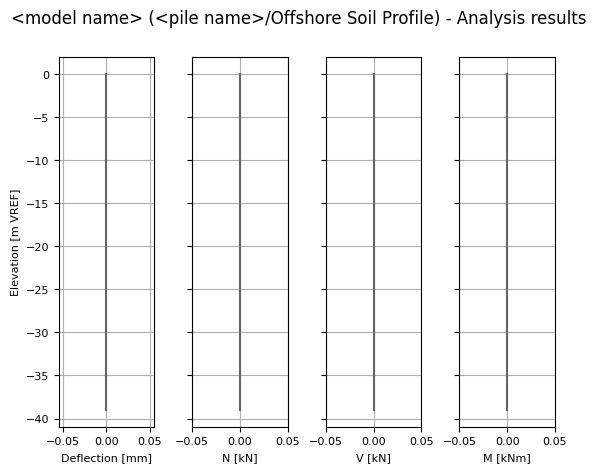

In [1]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand, API_clay_axial


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-39, diameter=10.0, wt=0.10
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(
                phi=33,
                kind="cyclic",
                extension="mt_curves",
            ),
            axial_model=API_clay_axial(Su=70),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic", extension="mt_curves"),
            axial_model=API_clay_axial(Su=70),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=sp, plugging=True)

# Apply bottom fixity along x-axis
# M.set_support(elevation=-39, Ty=True, Rz=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Px=-200000, Py=500)

# Run analysis
from openpile.analyze import winkler

Result = winkler(M)

# plot the results
Result.plot()


In [2]:
Result.forces

,Elevation [m],N [kN],V [kN],M [kNm]
0,0.0,NaN,NaN,NaN
1,-0.5,NaN,NaN,NaN
2,-0.5,NaN,NaN,NaN
3,-1.0,NaN,NaN,NaN
4,-1.0,NaN,NaN,NaN
...,...,...,...,...
151,-38.0,NaN,NaN,NaN
152,-38.0,NaN,NaN,NaN
153,-38.5,NaN,NaN,NaN
154,-38.5,NaN,NaN,NaN


In [3]:
from openpile.calculate import shaft_resistance, unit_end_bearing, isplugged

shaft_resistance(p,sp,True, True)
# unit_end_bearing(p,sp)*p.tip_footprint
# isplugged(p,sp, method="API-87", kind="tension")

121559.62529613005

In [5]:
from openpile.calculate import effective_pile_weight

effective_pile_weight(p,sp)


8248.188680146886

In [ ]:
from openpile.construct import SoilProfile, Layer
from openpile.soilmodels import API_sand, API_clay

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic"),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic"),
        ),
    ],
)

print(sp)


In [8]:
from openpile.construct import Layer
from openpile.soilmodels import API_clay

# Create a layer
layer1 = Layer(
    name="Soft Clay",
    top=0,
    bottom=-10,
    weight=18,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], kind="static"),
    axial_model=API_clay_axial(Su=70)
)

print(layer1)


Name: Soft Clay
Elevation: (0.0) - (-10.0) m
Weight: 18.0 kN/m3
Lateral model: 	API clay
	Su = 30.0-35.0 kPa
	eps50 = 0.01-0.02
	static curves
	ext: None
Axial model: 	API clay
	Su = 70.0 kPa


In [ ]:
import matplotlib.pyplot as plt
from openpile.utils.py_curves import api_sand

p, y = api_sand(
    sig=50,  # vertical stress in kPa
    X=5,  # depth in meter
    phi=35,  # internal angle of friction
    D=5,  # the pile diameter
    below_water_table=True,  # use initial subgrade modulus under water
    kind="static",  # static curve
)

plt.plot(y, p)
plt.ylabel("p [kN/m]")
plt.xlabel("y [m]")


In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import Dunkirk_sand, Cowden_clay, API_clay

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [6, 6],
        "diameter": [2.0, 2.0],
        "wall thickness": [0.07, 0.08],
    },
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="blabla 1",
            top=0,
            bottom=-10,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
        Layer(
            name="ohlalal",
            top=-10,
            bottom=-30,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
    ],
)

sp.plot()


In [ ]:
# import libraries
from openpile.construct import Pile, Model
from openpile.analyze import simple_beam_analysis

# create pile
pile = Pile(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={"length": [40], "diameter": [2], "wall thickness": [0.08]},
)

M = Model(name="", pile=pile)
M.set_support(elevation=0, Tx=True, Ty=True)
M.set_support(elevation=-40, Ty=True)
M.set_pointload(elevation=-20, Py=1000)

result = simple_beam_analysis(M)


In [ ]:
M.plot()


In [ ]:
# import p-y curve for api_sand from openpile.utils
from openpile.utils.py_curves import api_sand

y, p = api_sand(
    sig=50,  # vertical stress in kPa
    X=5,  # depth in meter
    phi=35,  # internal angle of friction
    D=5,  # the pile diameter
    below_water_table=True,  # use initial subgrade modulus under water
    kind="cyclic",  # static curve
)

# create a plot of the results with Matplotlib
import matplotlib.pyplot as plt

plt.plot(y, p)
plt.ylabel("p [kN/m]")
plt.xlabel("y [m]")


In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-40, diameter=7, wt=0.050
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sps = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-40,
            weight=18,
            lateral_model=API_sand(
                phi=33,
                kind="static",
                extension="mt_curves",
            ),
        ),
    ],
)

# Create a 40m deep offshore Soil Profile with a 15m water column
spc = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-50,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic", extension="mt_curves"),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=spc)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Mz=-600e3, Py=30e3)

# Run analysis
from openpile.analyze import winkler

Result = winkler(M)

# plot the results
Result.plot()

M.soil_properties


In [ ]:
M.get_py_springs()


### Check if multipliers work

In [ ]:
from openpile.construct import Layer
from openpile.soilmodels import API_sand
from openpile.utils.multipliers import durkhop

# Create a Layer with API_sand and monotonic curves with Durkhop approach
Layer(
    name="medium dense sand",
    top=0,
    bottom=-40,
    weight=18,
    lateral_model=API_sand(phi=33, kind="cyclic", p_multiplier=durkhop(D=7.0, ra=1.0)),
)


In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_sand
from openpile.utils.multipliers import durkhop

p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-40, diameter=7, wt=0.050
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sps = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-40,
            weight=18,
            lateral_model=API_sand(phi=33, kind="static"),
        ),
    ],
)

# Create a 40m deep offshore Soil Profile with a 15m water column
spc = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-40,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic", p_multiplier=durkhop(D=7, ra=1.0)),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=sps)
# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Mz=-300e3, Py=30e3)

# Run analysis
from openpile.analyze import winkler

Result = winkler(M)

# plot the results
Result.details()["Max. deflection [m]"]
